<a href="https://colab.research.google.com/github/kaueag/bibliotecapandas/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv('MKT.csv')

In [2]:
display(data)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [30]:
data['meses'] = range(0, len(data)) #Acrescentei essa coluna só para ter um eixo X mais pra frente na hora de plotar o gráfico em ordem cronológica, iremos ignorar essa coluna no restante da análise

data_original = data.drop(columns='meses')

In [31]:
data_original.describe().round(2)
#Aqui podemos ver que o gasto com YouTube traz pouquíssimo retorno, principalmente checando o Desvio Padrão que é mais do que 100 e gasto médio de quase 178
#Enquanto isso, o facebook e o jornal(newspaper) são os que mais trazem o maior retorno sobre investimento

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


In [8]:
data['facebook'].value_counts()

6.84     3
4.92     3
19.20    2
11.16    2
29.52    2
        ..
53.40    1
24.36    1
9.24     1
35.88    1
10.32    1
Name: facebook, Length: 145, dtype: int64

In [9]:
data['sales'].sort_values(ascending=False).reset_index()

,index,sales
0,146,32.40
1,154,31.44
2,169,30.60
3,69,30.48
4,118,30.48
...,...,...
166,27,6.60
167,79,6.36
168,49,6.36
169,126,3.84


<BarContainer object of 171 artists>

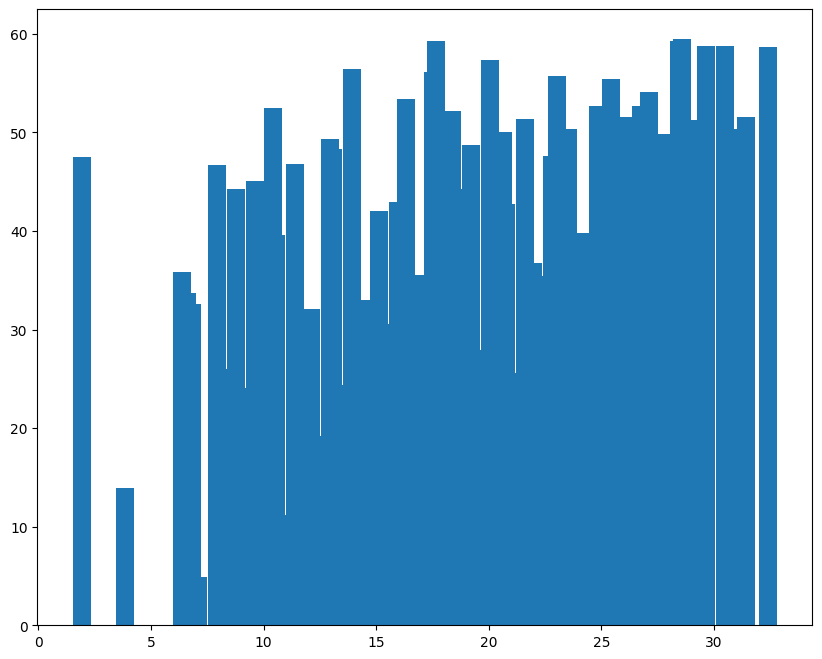

In [29]:
fig = plt.figure(figsize=(10,8))
plt.bar(data['sales'], data['facebook'])

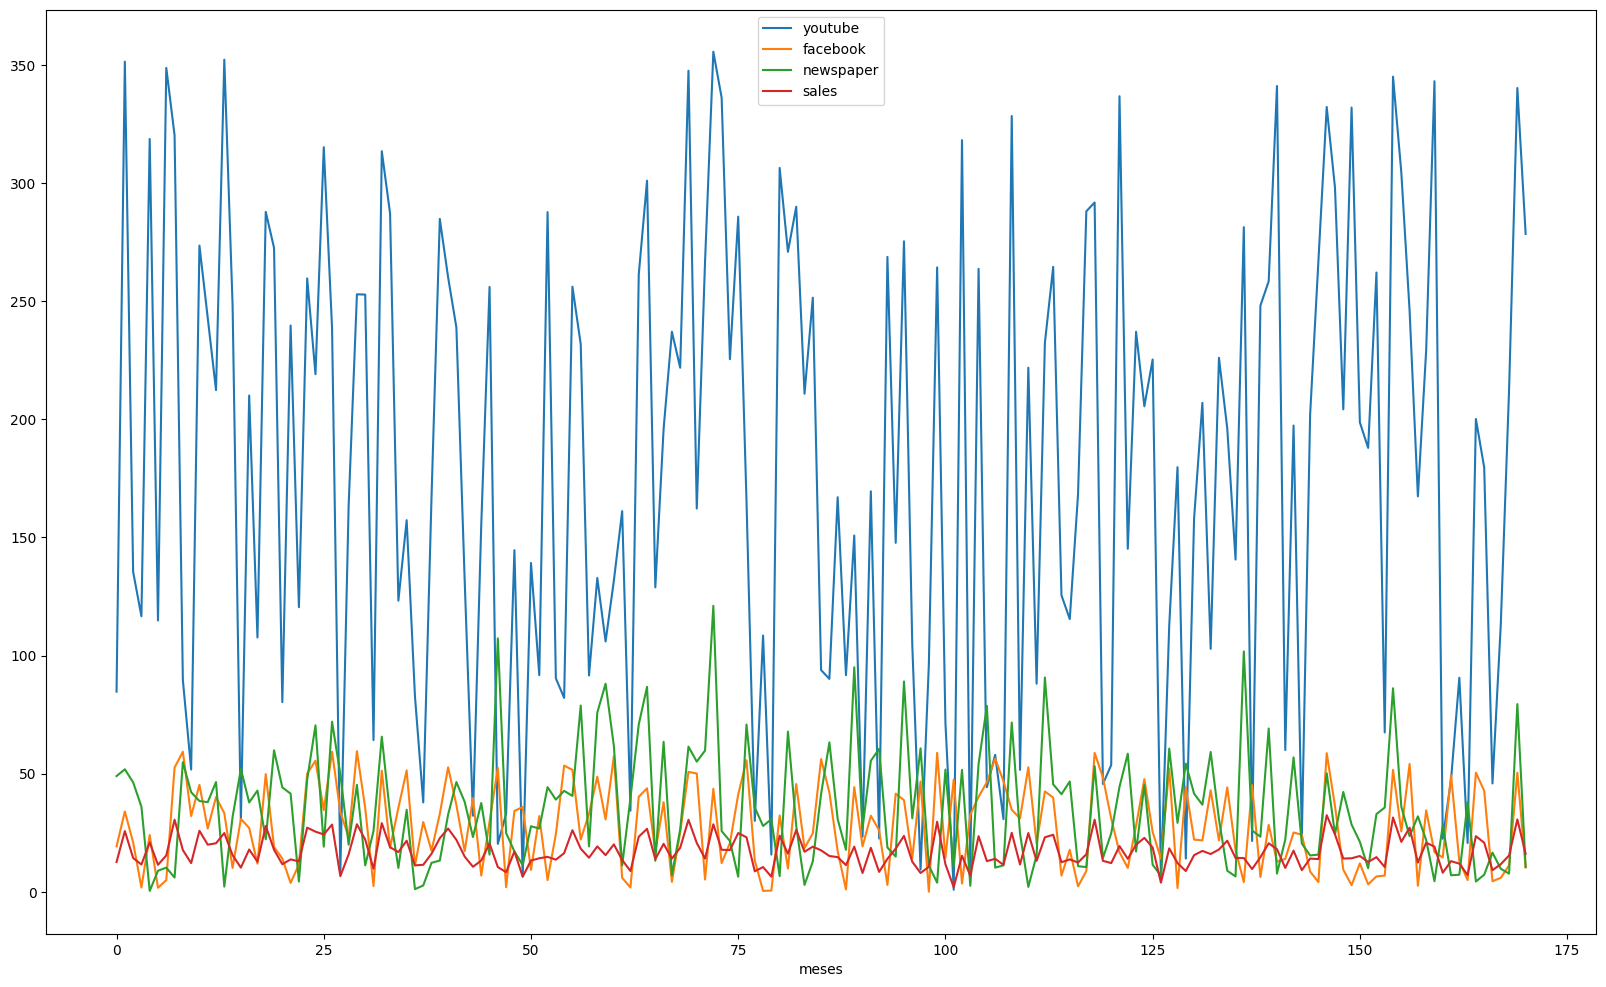

In [12]:
data.plot(x='meses', figsize=(20,12));

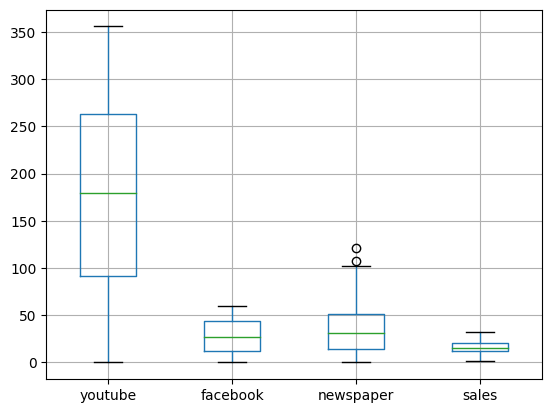

In [33]:
data_original.boxplot();
#O facebook é o que gera mais retorno, já que foi a mídia com menos investimento. Jornal em segundo lugar, bem próximo e o Youtube muito distante.
#Com isso, podemos perceber que o público dessa empresa não consome muito Youtube, provavelmente um público mais velho, que ainda usam com frequência o Facebook e que leêm jornal.

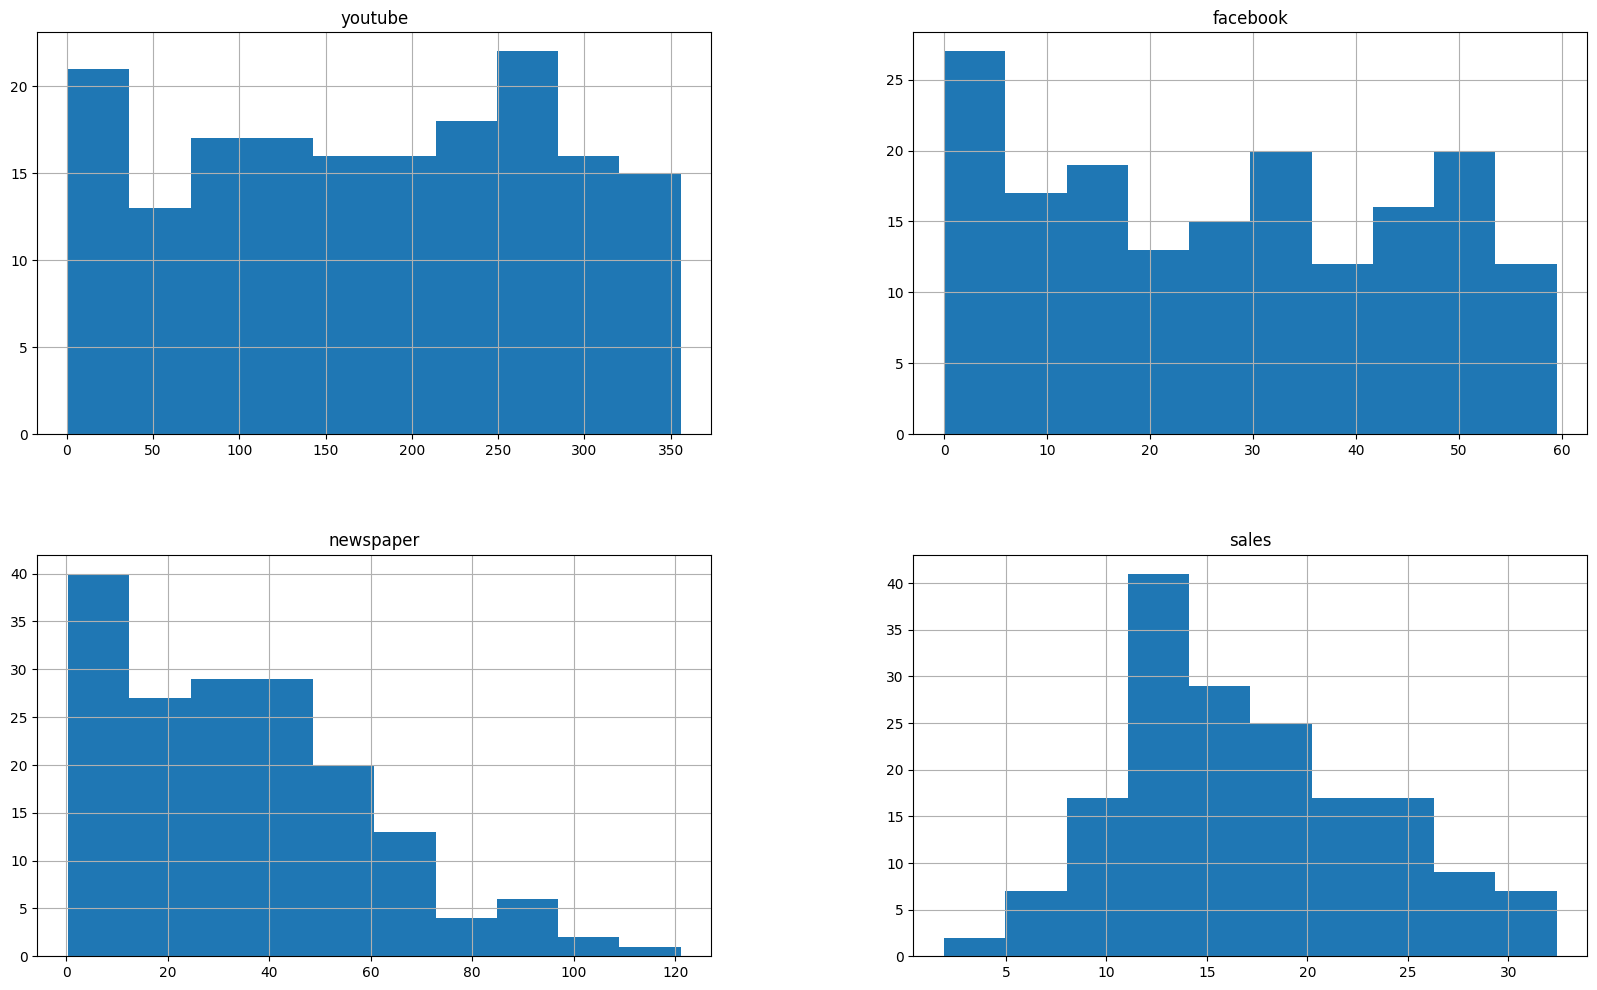

In [34]:
data_original.hist(figsize=(20,12));

In [37]:
data_original.corr()
#Apesar de o Youtube ter pouco retorno, ele aparece com a maior correlação, já que pelo histograma podemos ver que a frequência de gastos maiores é dele.
#Vale a pena lembrar do alto desvio padrão do Youtube, apesar de ter essa correlação, o investimento acaba sendo de maior risco devido essa volatilidade
#Enquanto isso, o jornal o jornal teve uma frequência bem mais irregular em relação ao tamanho do investimento.
#O Facebook no entanto parece ser o que dá mais retorno, já que possui um desvio padrão menor e ainda conta com uma correlação de 0.6



,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [63]:
# Dividir os dados em conjuntos de treinamento e teste
X = data_original[['youtube', 'facebook', 'newspaper']]
y = data_original['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = modelo.predict(X_test)

In [98]:
#Avaliando o quão bom o modelo é:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE é {mse}')
r = r2_score(y_test, y_pred)
print(f'R quadrado é: {r}')
print('O score do modelo é:',modelo.score(X,y))
#Podemos perceber que ele tem um MSE baixo, um R2 perto de 1 e um score de 89%, então é um modelo que está performando bem em três métricas.

MSE é 5.576790234026713
R quadrado é: 0.872863085701216
O score do modelo é:  0.8997380964436159


In [101]:
#Teste para ver se o modelo está prevendo bem, vamos colocar os inputs das duas primeiras linhas e comparar com o resultado previsto pela máquina:
Youtube = 84.72
Facebook = 19.20
Newspaper = 48.96
entrada = [[Youtube, Facebook, Newspaper]]
modelo.predict(entrada) #Esse primeiro deu 12.60 no ambiente real e na predição deu 11.17, valor bem próximo

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.17813732])

In [102]:
Youtube = 351
Facebook = 33.96
Newspaper = 51.84
entrada = [[Youtube, Facebook, Newspaper]]
modelo.predict(entrada) #25.68 foi o valor original e na predição deu 25.81, bem próximo também


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.81435631])

In [99]:
#Aqui podemos dar os inputs que quisermos para ter a previsão de sales
Youtube = 60
Facebook = 300
Newspaper = 50
entrada = [[Youtube, Facebook, Newspaper]]
modelo.predict(entrada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64.6963512])